In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
def find_beta_hat(X, y):
    return np.linalg.pinv(X) * y

def find_y_hat(X, beta):
    return X * beta

def find_G_hat(y_hat):
    return np.argmax(y_hat, axis=1)

### For the binary classification

* N = 100
* K = 2

In [19]:
Y1 = np.matrix([1, 0, 0])
Y2 = np.matrix([0, 1, 0])
Y3 = np.matrix([0, 0, 1])
Y1 = np.tile(Y1, (40, 1))
Y2 = np.tile(Y2, (30, 1))
Y3 = np.tile(Y3, (30, 1))

In [25]:
Y = np.vstack([Y1, Y2, Y3])
Y.shape

(100, 3)

In [196]:
feature = np.arange(0, 2)
np.random.seed(15)
x1 = np.random.normal(0.8, 0.1, size=(40, len(feature)))
x2_x = np.random.normal(1.0, 0.1, size=(30, 1))
x2_y = np.random.normal(2.7, 0.2, size=(30, 1))
x2 = np.column_stack([x2_x, x2_y])
x3 = np.random.normal(2.0, 0.15, size=(30, len(feature)))

In [197]:
X = np.vstack([x1, x2, x3])
Xb = sm.add_constant(X)
Xb.shape

(100, 3)

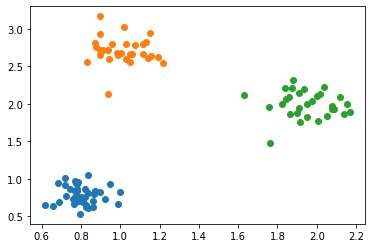

In [198]:
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1])
plt.scatter(x3[:,0], x3[:,1])
plt.show()

In [199]:
beta_hat = find_beta_hat(Xb, Y)
beta_hat

matrix([[ 1.6394669 ,  0.03004966, -0.66951656],
        [-0.36250781, -0.56896018,  0.93146799],
        [-0.46381203,  0.55457754, -0.09076551]])

In [200]:
y_hat = find_y_hat(Xb, beta_hat)
G_hat = find_G_hat(y_hat)

In [201]:
y_hat[0]

matrix([[ 0.97399675,  0.05512976, -0.0291265 ]])

In [202]:
type(G_hat)

numpy.matrix

In [203]:
(G_hat == 0)[1,0]

True

In [204]:
idx1 = [i for i in range(100) if (G_hat == 0)[i,0]]
idx2 = [i for i in range(100) if (G_hat == 1)[i,0]]
idx3 = [i for i in range(100) if (G_hat == 2)[i,0]]

In [205]:
new_x_1 = X[idx1]
new_x_2 = X[idx2]
new_x_3 = X[idx3]

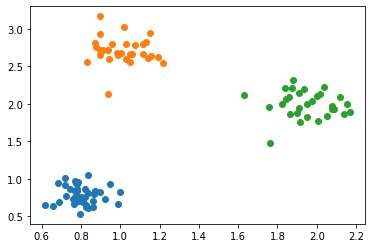

In [206]:
plt.scatter(new_x_1[:,0], new_x_1[:,1])
plt.scatter(new_x_2[:,0], new_x_2[:,1])
plt.scatter(new_x_3[:,0], new_x_3[:,1])
plt.show()

### Decision Boundary

In [207]:
xs = np.arange(0.6, 2.2, 0.001)
ys = np.arange(0.5, 2.25, 0.001)

In [208]:
b12 = []
b23 = []
b31 = []
for x in xs:
    for y in ys:
        X_temp = np.matrix([[1, x, y]])
        Y_temp = find_y_hat(X_temp, beta_hat)
        if abs(Y_temp[0,0] - Y_temp[0,1]) < 1e-3:
            b12.append([x, y])
        elif abs(Y_temp[0,1] - Y_temp[0,2]) < 1e-3:
            b23.append([x, y])
        elif abs(Y_temp[0,2] - Y_temp[0,0]) < 1e-3:
            b31.append([x, y])

In [209]:
b12 = np.matrix(b12)
b23 = np.matrix(b23)
b31 = np.matrix(b31)

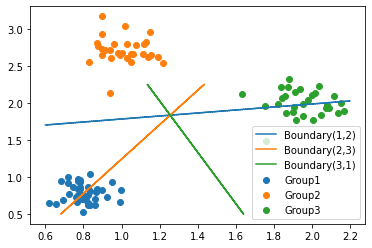

In [210]:
plt.scatter(new_x_1[:,0], new_x_1[:,1], label="Group1")
plt.scatter(new_x_2[:,0], new_x_2[:,1], label="Group2")
plt.scatter(new_x_3[:,0], new_x_3[:,1], label="Group3")
plt.plot(b12[:,0], b12[:,1], label="Boundary(1,2)")
plt.plot(b23[:,0], b23[:,1], label="Boundary(2,3)")
plt.plot(b31[:,0], b31[:,1], label="Boundary(3,1)")
plt.legend()
plt.show()